<a href="https://colab.research.google.com/github/shaikanishmib/Machine-Learning-Deep-Learning/blob/main/Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the neccesary Packages


In [43]:
!pip install pingouin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline


In [ ]:
train=pd.read_csv("train.csv")
train.head(2)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98


In [ ]:
test=pd.read_csv("test.csv")
test.head(2)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
train.describe().round()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.0,25424.0,30000.0,29828.0,27507.0,28297.0,30000.0,30000.0,25150.0,30000.0,30000.0,30000.0,29660.0
mean,40.0,2631.0,88826.0,401.0,2.0,740.0,0.0,502.0,2631.0,2.0,-5.0,131760.0,47649.0
std,16.0,11263.0,59537.0,243.0,1.0,72.0,0.0,288.0,11323.0,1.0,75.0,93550.0,48221.0
min,18.0,378.0,6048.0,-999.0,1.0,580.0,0.0,1.0,378.0,1.0,-999.0,-999.0,-999.0
25%,25.0,1650.0,41178.0,248.0,2.0,682.0,0.0,251.0,1650.0,1.0,1.0,60572.0,0.0
50%,40.0,2222.0,75128.0,375.0,2.0,740.0,0.0,504.0,2223.0,2.0,1.0,109994.0,35209.0
75%,55.0,3091.0,119965.0,521.0,3.0,799.0,0.0,751.0,3091.0,3.0,1.0,178881.0,74261.0
max,65.0,1777460.0,621498.0,3841.0,14.0,896.0,1.0,999.0,1777460.0,4.0,1.0,1077967.0,481907.0


In [ ]:
train.dtypes.value_counts()

object     11
float64     8
int64       5
dtype: int64

In [ ]:
nulval = train.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
Customer ID,0,0.00
Name,0,0.00
Gender,53,0.21
Age,0,0.00
Income (USD),4576,18.26
Income Stability,1683,6.72
Profession,0,0.00
Type of Employment,7270,29.01
Location,0,0.00
Loan Amount Request (USD),0,0.00


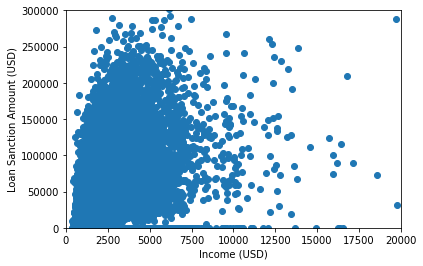

In [ ]:
plt.scatter(train['Income (USD)'],train['Loan Sanction Amount (USD)'])
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Income (USD)')
plt.xlim(0, 20000)
plt.ylim(0, 300000)
plt.show()

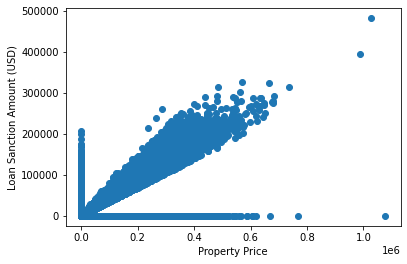

In [ ]:
plt.scatter(train['Property Price'],train['Loan Sanction Amount (USD)'])
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Property Price')

plt.show()

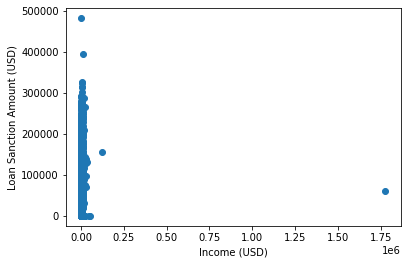

In [121]:
plt.scatter(train['Income (USD)'],train['Loan Sanction Amount (USD)'])
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Income (USD)')

plt.show()

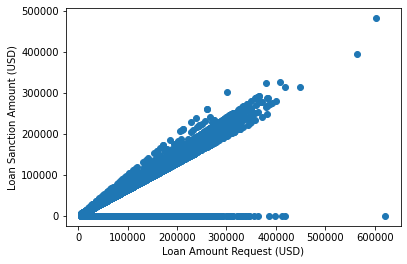

In [122]:
plt.scatter(train['Loan Amount Request (USD)'],train['Loan Sanction Amount (USD)'])
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Loan Amount Request (USD)')

plt.show()

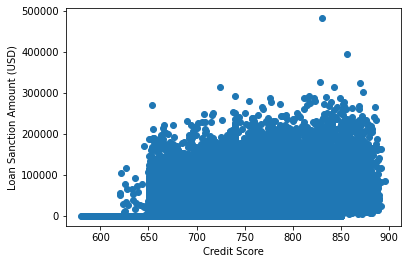

In [123]:
plt.scatter(train['Credit Score'],train['Loan Sanction Amount (USD)'])
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Credit Score')

plt.show()

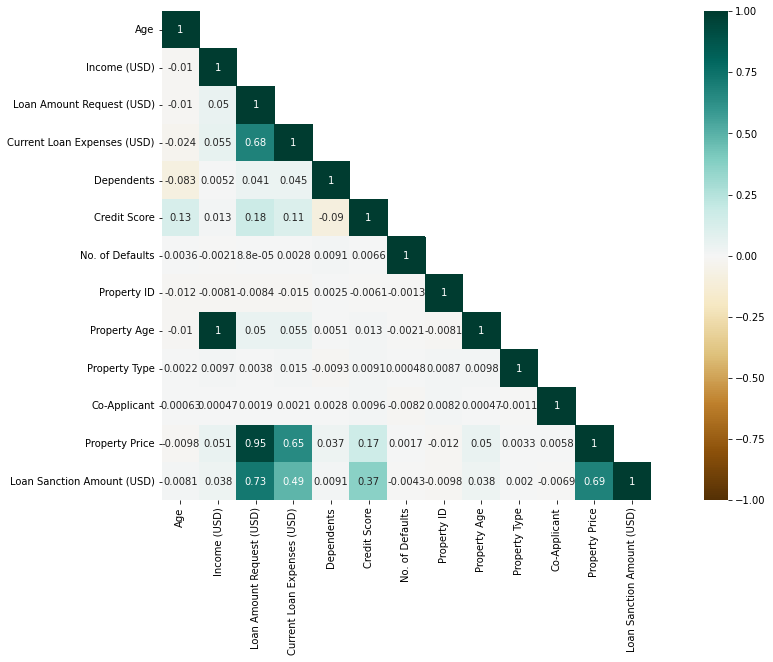

In [ ]:
mask = np.triu(train.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(train.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [ ]:
data_ca = train.select_dtypes(exclude=["int64","float64"]).copy()
data_nu = train.select_dtypes(exclude=["object","category"]).copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packa

!!!


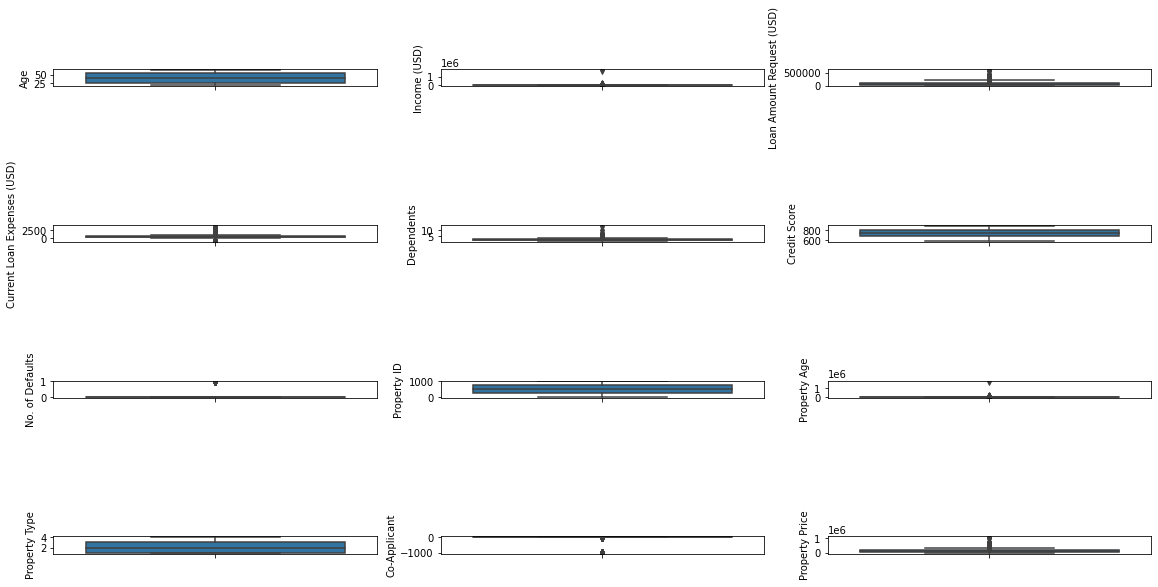

In [ ]:
try:
  fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 8))
  index = 0
  axs = axs.flatten()
  for k,v in data_nu.items():
      sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="h")
      index += 1
      plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
except:
  print("!!!")

In [ ]:
for column in train.columns:
    if train[column].isna().sum() != 0:
        missing = train[column].isna().sum()
        portion = (missing / train.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'Gender': number of missing values '53' ---> '0.177%'
'Income (USD)': number of missing values '4576' ---> '15.253%'
'Income Stability': number of missing values '1683' ---> '5.610%'
'Type of Employment': number of missing values '7270' ---> '24.233%'
'Current Loan Expenses (USD)': number of missing values '172' ---> '0.573%'
'Dependents': number of missing values '2493' ---> '8.310%'
'Credit Score': number of missing values '1703' ---> '5.677%'
'Has Active Credit Card': number of missing values '1566' ---> '5.220%'
'Property Age': number of missing values '4850' ---> '16.167%'
'Property Location': number of missing values '356' ---> '1.187%'
'Loan Sanction Amount (USD)': number of missing values '340' ---> '1.133%'


In [ ]:
train["Income (USD)"] = train['Income (USD)'].fillna(train['Income (USD)'].mean())

In [ ]:
train["Income Stability"] = train["Income Stability"].fillna(train["Income Stability"].value_counts().index[0])

In [ ]:
train["Dependents"] = train["Dependents"].fillna(train["Dependents"].value_counts().index[0])

In [ ]:
train["Credit Score"] = train['Credit Score'].fillna(train['Credit Score'].mean())

In [ ]:
train['Has Active Credit Card'].value_counts()

Active         9771
Inactive       9466
Unpossessed    9197
Name: Has Active Credit Card, dtype: int64

In [ ]:
train["Has Active Credit Card"] = train['Has Active Credit Card'].fillna("No Data")

In [ ]:
train['Has Active Credit Card'].value_counts()

Active         9771
Inactive       9466
Unpossessed    9197
No Data        1566
Name: Has Active Credit Card, dtype: int64

In [ ]:
train['Property Age'].value_counts()

2415.70    4
1608.43    4
3038.32    3
2261.56    3
1868.78    3
          ..
1876.15    1
1670.49    1
1333.88    1
5063.58    1
1216.00    1
Name: Property Age, Length: 24179, dtype: int64

In [ ]:
train.drop(['Type of Employment','Property Age'],axis=1,inplace=True)

In [ ]:
nulval = train.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
Customer ID,0,0.00
Name,0,0.00
Gender,53,5.75
Age,0,0.00
Income (USD),0,0.00
Income Stability,0,0.00
Profession,0,0.00
Location,0,0.00
Loan Amount Request (USD),0,0.00
Current Loan Expenses (USD),172,18.68


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 30000 non-null  float64
 5   Income Stability             30000 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Location                     30000 non-null  object 
 8   Loan Amount Request (USD)    30000 non-null  float64
 9   Current Loan Expenses (USD)  29828 non-null  float64
 10  Expense Type 1               30000 non-null  object 
 11  Expense Type 2               30000 non-null  object 
 12  Dependents                   30000 non-null  float64
 13  Credit Score    

In [ ]:
train.drop(['Customer ID','Name','Property ID'],axis=1,inplace=True)
train.drop(['Age','Dependents','No. of Defaults', 'Property Type', 'Co-Applicant','Gender','Profession','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location'],axis=1,inplace=True)

In [ ]:
train=train.dropna()
train= train.reset_index(drop = True)

In [ ]:
train_nu = train.select_dtypes(exclude=["object","category"]).copy()

In [ ]:
Xnum = train_nu.drop(["Loan Sanction Amount (USD)"], axis= "columns")
ynum = train_nu['Loan Sanction Amount (USD)']


In [ ]:
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
Income (USD),0.0349,0.0
Loan Amount Request (USD),0.7255,0.0
Current Loan Expenses (USD),0.4851,0.0
Credit Score,0.3598,0.0
Property Price,0.6864,0.0


The features having p-value higher than 0.05 has to be removed. i.e. 'Age','Dependents','No.of Defaults', 'Property Type', 'Co-Applicant'.

In [ ]:
Xcat = train.select_dtypes(exclude=['int64','float64']).copy()

In [ ]:
Xcat['target'] = train['Loan Sanction Amount (USD)']
Xcat.dropna(how="any", inplace=True)
ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

In [ ]:
for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,-999.00,0.00,4023.18,4121.66,4183.49,4319.61,4417.18,4445.54,4482.97,4488.02,4507.67,4554.33,4572.19,4581.22,4589.30,4592.28,4619.50,4642.29,4672.09,4673.32,4685.74,4704.34,4724.21,4730.36,4792.63,4874.06,4874.91,4880.12,4880.49,4886.44,4910.30,4939.76,4979.95,4983.50,5005.04,5062.41,5066.94,5083.23,5130.35,5143.77,...,257393.33,258527.86,260138.31,261033.50,261392.65,261486.85,261793.48,262816.61,265539.22,266138.86,266492.98,267630.05,267751.53,268156.50,269309.77,270552.64,271793.03,272666.44,273930.76,274277.23,276618.44,278166.37,278542.94,279688.12,280759.36,286627.98,286728.12,287083.11,287540.07,288477.14,289506.99,292666.61,293150.14,301457.20,313452.68,313502.39,323233.31,326730.56,395368.74,481907.32
Income Stability,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,19,374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Low,315,7473,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


p-value: 0.0000000000000000000000000


In [ ]:
 train["Income Stability"] = train["Income Stability"].map({"High":1,"Low":0})


Remove all the columns having p-value greater than 0.05. 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29493 entries, 0 to 29492
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income (USD)                 29493 non-null  float64
 1   Income Stability             29493 non-null  int64  
 2   Loan Amount Request (USD)    29493 non-null  float64
 3   Current Loan Expenses (USD)  29493 non-null  float64
 4   Credit Score                 29493 non-null  float64
 5   Property Price               29493 non-null  float64
 6   Loan Sanction Amount (USD)   29493 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


In [ ]:
train.to_csv("train_final_V2.csv")

In [ ]:
train

,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,Property Price,Loan Sanction Amount (USD)
0,1933.050000,0,72809.58,241.08,809.440000,119933.46,54607.18
1,4952.910000,0,46837.47,495.81,780.400000,54791.00,37469.98
2,988.190000,1,45593.04,171.95,833.150000,72440.58,36474.43
3,2630.574417,1,80057.92,298.54,832.700000,121441.51,56040.54
4,2614.770000,0,113858.89,491.41,745.550000,208567.91,74008.28
...,...,...,...,...,...,...,...
29488,4969.410000,0,76657.90,722.34,869.610000,111096.56,68992.11
29489,1606.880000,0,66595.14,253.04,729.410000,73453.94,46616.60
29490,2630.574417,0,81410.08,583.11,739.885381,102108.02,61057.56
29491,2417.710000,0,142524.10,378.29,677.270000,168194.47,99766.87


In [ ]:
train['Loan Sanction Amount (USD)'].value_counts()

 0.00         7847
-999.00        334
 28937.45        3
 27767.18        2
 15270.22        2
              ... 
 61901.05        1
 288477.14       1
 35293.26        1
 52457.57        1
 34041.85        1
Name: Loan Sanction Amount (USD), Length: 21306, dtype: int64

In [ ]:
index_names = train[ (train['Loan Sanction Amount (USD)'] == -999.00) ].index

In [ ]:
index_names

Int64Index([   22,   143,   248,   381,   477,   565,   610,   663,   683,
              732,
            ...
            28788, 28851, 28997, 29129, 29195, 29294, 29369, 29409, 29429,
            29431],
           dtype='int64', length=334)

In [ ]:
train=train.drop(index_names)
train= train.reset_index(drop = True)

In [ ]:
train1=pd.read_csv("train_final_V2.csv")
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29493 entries, 0 to 29492
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   29493 non-null  int64  
 1   Income (USD)                 29493 non-null  float64
 2   Income Stability             29493 non-null  int64  
 3   Loan Amount Request (USD)    29493 non-null  float64
 4   Current Loan Expenses (USD)  29493 non-null  float64
 5   Credit Score                 29493 non-null  float64
 6   Property Price               29493 non-null  float64
 7   Loan Sanction Amount (USD)   29493 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.8 MB


In [54]:
X=train1[['Income (USD)','Income Stability','Loan Amount Request (USD)','Current Loan Expenses (USD)','Credit Score','Property Price']]

In [55]:
X

,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,Property Price
0,1933.05,0,72809.58,241.08,809.44,119933.46
1,4952.91,0,46837.47,495.81,780.40,54791.00
2,988.19,1,45593.04,171.95,833.15,72440.58
3,2630.57,1,80057.92,298.54,832.70,121441.51
4,2614.77,0,113858.89,491.41,745.55,208567.91
...,...,...,...,...,...,...
29488,4969.41,0,76657.90,722.34,869.61,111096.56
29489,1606.88,0,66595.14,253.04,729.41,73453.94
29490,2630.57,0,81410.08,583.11,739.89,102108.02
29491,2417.71,0,142524.10,378.29,677.27,168194.47


In [56]:
y=train1['Loan Sanction Amount (USD)']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [92]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [94]:
regressor1 = RandomForestRegressor(bootstrap=False,max_features=0.7,min_samples_leaf=0.004196633747563344,min_samples_split=0.008991789964660124,n_estimators=25,)


In [95]:
regressor1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None,
                      min_samples_leaf=0.004196633747563344,
                      min_samples_split=0.008991789964660124,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
y_pred1 = regressor.predict(X_test)

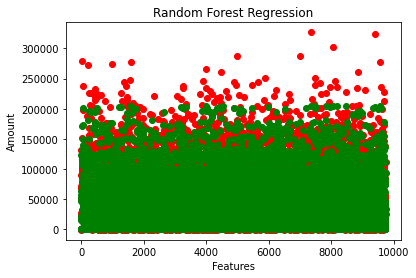

In [78]:
X_test=np.arange(0,len(X_test),1)
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred1, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Features')
plt.ylabel('Amount')
plt.show()

In [98]:
r2_score(y_test, y_pred1)

0.6694849377273793

In [99]:
regressor2=GradientBoostingRegressor(max_depth=4)

In [100]:
regressor2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
y_pred2 = regressor2.predict(X_test)

In [104]:
r2_score(y_test, y_pred2)

0.6689495515519368